___
# MINIPROJETO 1

## <font color='red'>Juliana Costa Pessoa</font>
___

## <font color='blue'>Temperaturas em Copacabana no mês de junho/2013</font>

___
### Itens 1 a 3 - Resolução:

In [294]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\pesso\Documents\CIÊNCIA DOS DADOS\MINIPROJETO


In [295]:
dados = pd.read_table('metereologia1.txt', encoding="windows-1252", sep=",")

In [296]:
copacabana = dados[dados.Localizacao == 'Copacabana']

In [297]:
df = pd.DataFrame()

df["temperatura"] = copacabana.Temperatura_Valor

In [299]:
d = df.temperatura.dropna()

In [300]:
crescente = ct.sort(ascending=False)
crescente.head()

,frequência relativa
temperatura,
30.3,0.002188
30.1,0.001094
30.0,0.001094
29.9,0.001094
29.7,0.001094


In [301]:
d.describe()

count    1828.000000
mean       22.975985
std         2.205796
min        18.400000
25%        21.500000
50%        22.500000
75%        24.200000
max        30.300000
Name: temperatura, dtype: float64

___
### Itens 4 a 6 - Resolução:

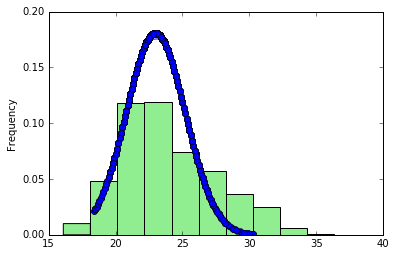

In [390]:
fit = stats.norm.pdf(d, np.mean(d), np.std(d)) 

plt.plot(d,fit,'-o')

plot = dados.Temperatura_Valor.plot(kind='hist', color='lightgreen', normed=1) 

plt.show()    

4) 

A hipótese é de que terá assimetria à direita, pois as maiores frequências estão à esquerda, nos menores valores de temperatura. No entanto, estima-se que será uma leve assimetria. 

As variáveis analisadas serão contínuas, visto que são valores mensuráveis e continuados, mas que fazsem sentido ao ser representadas por números decimais, como as representações nas tabelas acima. 

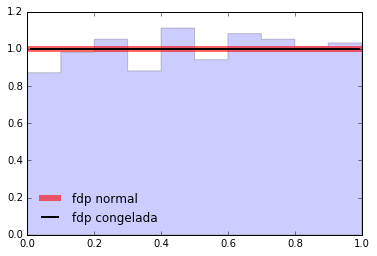

In [392]:
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = stats.uniform.stats(moments='mvsk')
x = np.linspace(stats.uniform.ppf(0.01),
                stats.uniform.ppf(0.99), 100)
ax.plot(x, stats.uniform.pdf(x),
       'r-', lw=6, alpha=0.6, label='fdp normal')

rv = stats.uniform()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='fdp congelada')

r = stats.uniform.rvs(size=1000)

ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()


O modelo uniforme contínuo foi escolhido porque é um dos mais utilizados e mais importantes dentro da teoria de probabilidades estatísticas. Essa distribuição é caracterizada por considerar que todos os valores de uma dada variável aleatória contínua têm a mesma probabilidade de ocorrer. No gráfico acima está plotado o histograma e a probabilidade total (100% = 1 = área do gráfico), que é a soma de todas as probabilidades.

# Estimativa de parâmetros

Escolheu-se 23.5 para a média através da observação do gráfico acima. Analisando x mínimo e x máximo, fez-se uma hipótese de que o desvio padrão fosse aproximadamente 3.

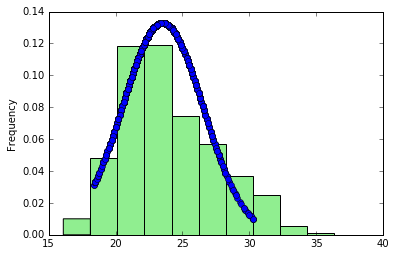

In [382]:
fit = stats.norm.pdf(d, 23.5, 3) 

plt.plot(d,fit,'-o')

plot = dados.Temperatura_Valor.plot(kind='hist', color='lightgreen', normed=1) 

plt.show() 

# Função fit() de parâmetros

In [380]:
mu, std = stats.norm.fit(d)

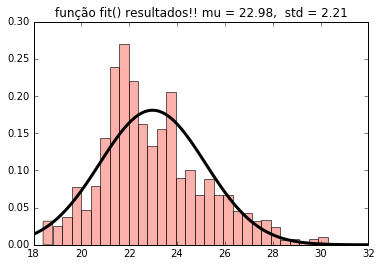

In [345]:
faixa = 30 #dias

plt.hist(d, bins=faixa, normed=True, alpha=0.6, color='salmon')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=3)
title = "função fit() resultados!! mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

___
### Itens 7 a 9 - Resolução:

## Histograma junto com fdp

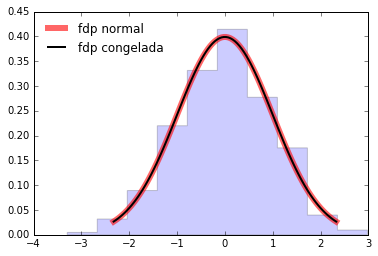

In [387]:
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = stats.norm.stats(moments='mvsk')
x = np.linspace(stats.norm.ppf(0.01),
                stats.norm.ppf(0.99), 100)
ax.plot(x, stats.norm.pdf(x),
       'r-', lw=6, alpha=0.6, label='fdp normal')

rv = stats.norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='fdp congelada')

r = stats.norm.rvs(size=1000)

ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()


## QQ-Plot (valores teóricos vs valores amostrais)

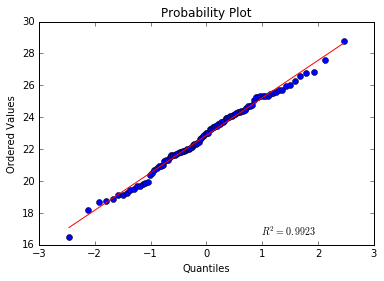

In [395]:
measurements = np.random.normal(loc = 23, scale = 2.2, size=100)   
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

A linha vermelha representa os valores teóricos, enquanto as bolinhas vermelhas indicam os valores da amostra para uma distribuição lognormal. Não há muita discrepância, então é razoável que esse modelo seja adotado.

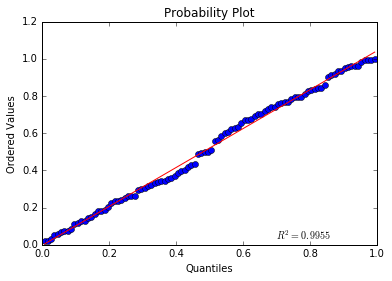

In [445]:
measurements2 = np.random.uniform(size=100)   
stats.probplot(measurements2, dist="uniform", plot=pylab)
pylab.show()

A linha vermelha representa os valores teóricos, enquanto as bolinhas vermelhas indicam os valores da amostra para uma distribuição uniforme contínua. Isso indica que há uma grande concordância entre eles, então é bem razoável que esse modelo seja adotado para analisar essa variável contínua em qustão.

## Frequência relativa acumulada vs função distribuição acumulada

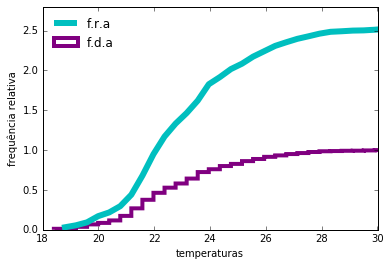

In [446]:
import numpy, scipy, pylab, random
counts, bin_edges = np.histogram(d, bins=30, normed=True)

cdf = np.cumsum(counts)

plt.plot(bin_edges[1:], cdf, color="c", linewidth=6, label="f.r.a")

plt.ylabel('frequência relativa')
plt.xlabel('temperaturas')

binsCnt = 30
bins = np.append(np.linspace(d.min(), d.max(), binsCnt), [np.inf])
plt.hist(d, bins =30, normed=1, histtype='step', cumulative=True, color='purple', linewidth=4, label="f.d.a")

plt.legend(loc='best', frameon=False)

plt.xlim(18, 30)
plt.ylim(0,2.8)
plt.show()

___
### Itens 10 e 11 - Resolução:

O melhor modelo para a variável contínua em análise é o uniforme contínuo, pois ao analisarmos os gráficos ao longo do trabalho, tem-se uma menor discrepância de valores e, além disso, a amostra varia pouco de valor, considerando a quantidade de valores. Por isso, é razoável considerar que cada valor assume uma mesma probabilidade ao longo distribuição.